## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 6. 학습 관련 기술들
### 6.1 Appendix : Optimization method comparison with mnist

### Load modules & library

In [1]:
import numpy as np
import matplotlib.pylab as plt
import sys
import os
os.chdir('C:\\Users\\KBS\\PycharmProjects\\Deep_learning_scratch') # 아래의 module들이 있는 directory 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

### Load mnist data

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

### Experiment settings
    Network structure : (784,100,100,100,100,10)

In [3]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

### Training network 

In [4]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 400 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

C:\Users\KBS\PycharmProjects\Deep_learning_scratch\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


===========iteration:0===========
SGD:2.38773389006
Momentum:2.39389183541
AdaGrad:2.25030461762
Adam:2.22305705962
RMSprop:inf
===========iteration:400===========
SGD:0.471280721464
Momentum:0.194399099707
AdaGrad:0.0688601494545
Adam:0.131266096417
RMSprop:0.164315777233
===========iteration:800===========
SGD:0.305280013298
Momentum:0.10592842627
AdaGrad:0.0454782443341
Adam:0.0910799968658
RMSprop:0.0777704448657
===========iteration:1200===========
SGD:0.262185696644
Momentum:0.0723707882837
AdaGrad:0.0339245317579
Adam:0.0394940709547
RMSprop:0.0983100805877
===========iteration:1600===========
SGD:0.192583436612
Momentum:0.088556419226
AdaGrad:0.0793842573705
Adam:0.0674244275451
RMSprop:0.0830261886942


### Visualization 

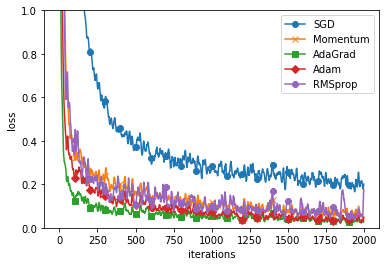

In [5]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop" : '8'}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()